# Laboratory 3: Stability of the equilibrium points

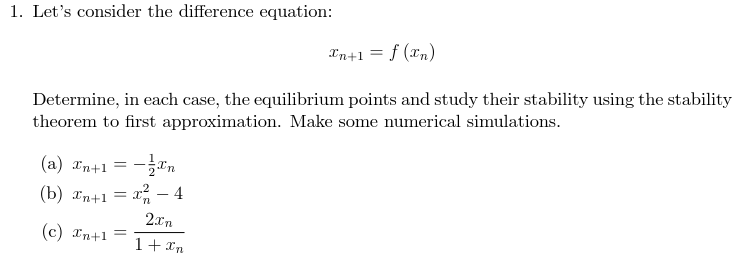

$x^* = f(x^*, x^*, \dots, x^*)$ </br>
$x^*$ - equilibrium point <br>
$\left|f'(x^*)\right| < 1 \rightarrow x^*\ asymptotically\ stable$ </br>
$\left|f'(x^*)\right| > 1 \rightarrow x^*\ unstable$

In [2]:
%display latex

In [75]:
def eq_points_stability(f):
    eq = x == f(x)
    eqp = solve(eq, x)
    show(eqp)
    
    df = diff(f(x), x)
    for eq_point in eqp:
        stable = df.subs(x=eq_point.rhs()) < 1
        if stable:
            show(f"eq_point: {eq_point.rhs()} is asymptotically stable")
        else:
            show(f"eq_point: {eq_point.rhs()} is unstable")

def eq_points(f, no_params):
    eq = x == f(*[x]*no_params)
    eqp = solve(eq, x, to_poly_solve=True)
    return eqp

def stability(df, eqp):
    for eq_point in eqp:
        stable = df.subs(eq_point) < 1
        if stable:
            show(f"eq_point: {eq_point} is asymptotically stable")
        else:
            show(f"eq_point: {eq_point} is unstable")

In [3]:
f1 = lambda x: -1/2 * x
eq_points_stability(f1)

[x == 0]

'eq_point: 0 is asymptotically stable'

In [4]:
f2 = lambda x: x^2 - 4
eq_points_stability(f2)

[x == -1/2*sqrt(17) + 1/2, x == 1/2*sqrt(17) + 1/2]

'eq_point: -1/2*sqrt(17) + 1/2 is asymptotically stable'

'eq_point: 1/2*sqrt(17) + 1/2 is unstable'

In [5]:
f3 = lambda x: (2 * x) / (1 + x)
eq_points_stability(f3)

[x == 0, x == 1]

'eq_point: 0 is unstable'

'eq_point: 1 is asymptotically stable'

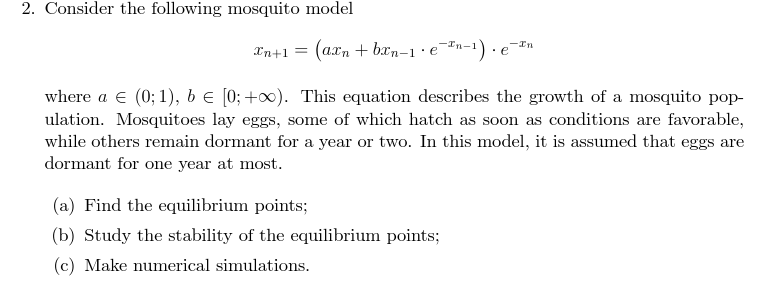

$p_1 = \frac{\partial f}{\partial u}\left(x^*, x^*\right) \ \ \ p_2 = \frac{\partial f}{\partial v}\left(x^*, x^*\right)$ </br>
$y_{n+1} = p_1y_n + p_2y_{n-1}$ </br>
$q^2 = p_1q + p_2$ - characteristic equation</br>
$\left| q_{1,2}\right| \lt 1 \rightarrow x^*\ locally\ asymptotically\ stable$ </br>
$\exists\ q\ s.t. \left|q\right| \gt 1 \rightarrow x^*\ unstable$

In [87]:
var('x, u, v')
a, b = 0.2, 0.2
f(u, v) = (a*u + b*v*exp(-v))*exp(-u)

Using normal approach

In [88]:
eqp = eq_points(f, 2)
show(eqp)
p1 = diff(f(u,v), u)
p2 = diff(f(u,v), v)

[-0.582934829024493, 0.0, -1.02650308340961 + 3.14159265358979*I]

In [85]:
q = var('q')

for eq_point in eqp:
    p1_val = p1.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n())
    p2_val = p2.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n())
    
    eq = q^2 == p1_val*q + p2_val
    q_roots = solve(eq, q)
    
    if q_roots[0] < 1 and q_roots[1] < 1:
        show(f"eq_point: {eq_point.rhs()} - l.a.s.")
    else:
        show(f"eq_point: {eq_point.rhs()} - unstable")

AttributeError: 'Float' object has no attribute 'rhs'

Using __Schur-Cohn Criterion__ </br>
- $q^2 = p_1q + p_2$ </br>
$\left|q_{1,2}\right| \lt 1 \leftrightarrow \left|p_1\right| \lt 1 - p_2 \lt 2$ </br>

In [11]:
for eq_point in eqp:
    p1_val = p1.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n())
    p2_val = p2.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n())
    
    if abs(p1_val) < 1 - p2_val and 1 - p2_val < 2:
        show(f"eq_point: {eq_point.rhs()} - l.a.s.")
    else:
        show(f"eq_point: {eq_point.rhs()} - unstable")

'eq_point: log(-1/10*sqrt(21) + 1/10) - unstable'

'eq_point: log(1/10*sqrt(21) + 1/10) - unstable'

'eq_point: 0 - l.a.s.'

c) Simulations: $a \in (0, 1), b \in [0, +\infty)$

In [13]:
import matplotlib.pyplot as plt

(0.200000000000000*v*e^(-v) + 0.200000000000000*u)*e^(-u)

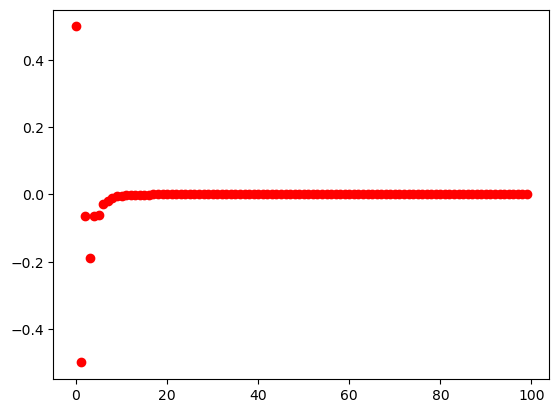

In [17]:
a, b = 0.3, 10
show(f(u,v))
N = 100
x = [0] * N
x[0], x[1] = 0.5, -0.5
for i in range(2, N):
    x[i] = f(x[i-1], x[i-2])
plt.plot(range(N), x, 'ro')
plt.show()

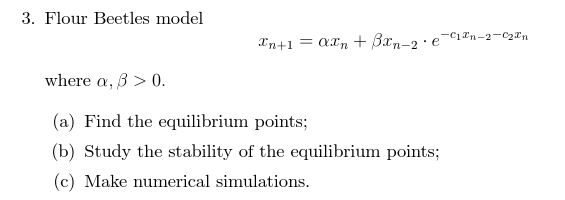

$p_1 = \frac{\partial f}{\partial u}\left(x^*, x^*, x^*\right) \ \ \ p_2 = \frac{\partial f}{\partial v}\left(x^*, x^*, x^*\right) \ \ \ p_3 = \frac{\partial f}{\partial v}\left(x^*, x^*, x^*\right)$ </br>
$y_{n+1} = p_1y_n + p_2y_{n-1} + p_3y_{n-2}$ </br>
$q^3 = p_1q^2 + p_2q+p_3$ - characteristic equation</br>
$\left| q_{1,2,3}\right| \lt 1 \rightarrow x^*\ locally\ asymptotically\ stable$ </br>
$\exists\ q\ s.t. \left|q\right| \gt 1 \rightarrow x^*\ unstable$

In [5]:
var('x, u, v, w')
a, b = 0.2, 0.2
c1, c2 = 2, 4
f(u, v, w) = a*u + b*w*exp(-c1*w-c2*u)

In [6]:
eqp = eq_points(f, 3)
show(eqp)
p1 = diff(f(u,v,w), u)
p2 = diff(f(u,v,w), v)
p3 = diff(f(u,v,w), w)

[x == log(1/4*I*sqrt(3)*2^(2/3) + 1/4*2^(2/3)),
 x == log(1/4*I*sqrt(3)*2^(2/3) - 1/4*2^(2/3)),
 x == log(-1/2*2^(2/3)),
 x == log(-1/4*I*sqrt(3)*2^(2/3) - 1/4*2^(2/3)),
 x == log(-1/4*I*sqrt(3)*2^(2/3) + 1/4*2^(2/3)),
 x == -1/3*log(2),
 x == 0]

In [7]:
q = var('q')

for eq_point in eqp:
    p1_val = p1.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n(), w = eq_point.rhs().n())
    p2_val = p2.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n(), w = eq_point.rhs().n())
    p3_val = p3.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n(), w = eq_point.rhs().n())
    
    eq = q^3 == p1_val*q^2 + p2_val*q + p3_val
    q_roots = solve(eq, q)
    
    if q_roots[0] < 1 and q_roots[1] < 1 and q_roots[2] < 1:
        show(f"eq_point: {eq_point.rhs()} - l.a.s.")
    else:
        show(f"eq_point: {eq_point.rhs()} - unstable")

'eq_point: log(1/4*I*sqrt(3)*2^(2/3) + 1/4*2^(2/3)) - unstable'

'eq_point: log(1/4*I*sqrt(3)*2^(2/3) - 1/4*2^(2/3)) - unstable'

'eq_point: log(-1/2*2^(2/3)) - unstable'

'eq_point: log(-1/4*I*sqrt(3)*2^(2/3) - 1/4*2^(2/3)) - unstable'

'eq_point: log(-1/4*I*sqrt(3)*2^(2/3) + 1/4*2^(2/3)) - unstable'

'eq_point: -1/3*log(2) - unstable'

'eq_point: 0 - unstable'

Using __Schur-Cohn Criterion__
- $q^3 = p_1q^2 + p_2q + p_3$ </br>
$\left|q_{1,2,3}\right| \lt 1 \leftrightarrow \left|p_3 + p_1\right| \lt 1 - p_2\ and\ \left|p_1p_3+p_2\right| \lt 1 - p_3^2$ </br>

In [8]:
for eq_point in eqp:
    p1_val = p1.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n(), w = eq_point.rhs().n())
    p2_val = p2.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n(), w = eq_point.rhs().n())
    p3_val = p3.subs(u = eq_point.rhs().n(), v = eq_point.rhs().n(), w = eq_point.rhs().n())

    if abs(p3_val + p1_val) < 1 - p2_val and abs(p1_val * p3_val + p2_val) < 1 - p3_val^2:
        show(f"eq_point: {eq_point.rhs()} - l.a.s.")
    else:
        show(f"eq_point: {eq_point.rhs()} - unstable")

'eq_point: log(1/4*I*sqrt(3)*2^(2/3) + 1/4*2^(2/3)) - unstable'

'eq_point: log(1/4*I*sqrt(3)*2^(2/3) - 1/4*2^(2/3)) - unstable'

'eq_point: log(-1/2*2^(2/3)) - unstable'

'eq_point: log(-1/4*I*sqrt(3)*2^(2/3) - 1/4*2^(2/3)) - unstable'

'eq_point: log(-1/4*I*sqrt(3)*2^(2/3) + 1/4*2^(2/3)) - unstable'

'eq_point: -1/3*log(2) - unstable'

'eq_point: 0 - l.a.s.'

0.200000000000000*w*e^(-4*u - 2*w) + 0.200000000000000*u

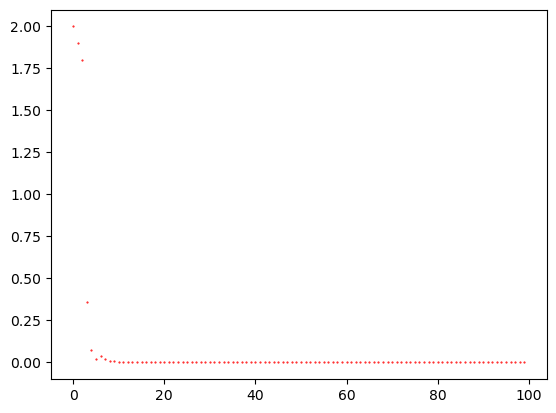

In [16]:
a, b = 0.3, 10
show(f(u,v,w))
N = 100
x = [0] * N
x[0], x[1], x[2] = 2, 1.9, 1.8
for i in range(3, N):
    x[i] = f(x[i-1], x[i-2], x[i-3])
plt.plot(range(N), x, 'ro', ms=0.5)
plt.show()

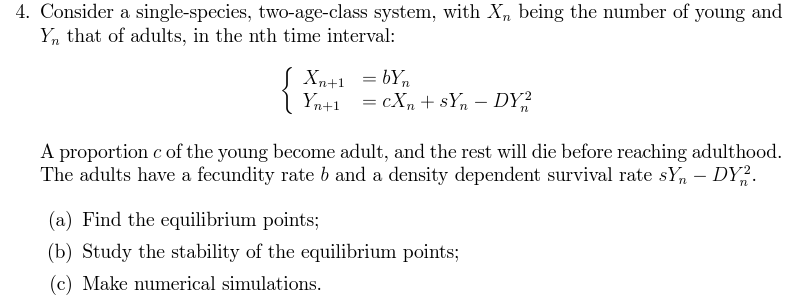

$u = X_{n}$</br>
$v = Y_{n}$

In [49]:
var('u v b c s D')
f1 = b*v
f2 = c*u + s*v - D*v^2
solve([f1 - u, f2 - v], [u,v])

[(0, 0), (b*(b*c + s - 1)/D, (b*c + s - 1)/D)]

In [48]:
jacobian([
    b*v, 
    c*u + s*v - D*v^2
], [u,v])

[         0          b]
[         c -2*D*v + s]

In [52]:
J = jacobian([
    b*v, 
    c*u + s*v - D*v^2
], [u, v])
A1 = J.subs(u=0, v=0)
A1

[0 b]
[c s]

In [47]:
A1.eigenvalues()

[1/2*s - 1/2*sqrt(4*b*c + s^2), 1/2*s + 1/2*sqrt(4*b*c + s^2)]

In [45]:
A2 = J.subs(u=b*(b*c + s-1)/D, v=(b*c+s-1)/D)
A2

[             0              b]
[             c -2*b*c - s + 2]

In [44]:
A2.eigenvalues()

[-b*c - 1/2*s - 1/2*sqrt(4*b^2*c^2 - 4*b*c + 4*(b*c - 1)*s + s^2 + 4) + 1,
 -b*c - 1/2*s + 1/2*sqrt(4*b^2*c^2 - 4*b*c + 4*(b*c - 1)*s + s^2 + 4) + 1]

c) Numerical simulations 

In [55]:
import matplotlib.pyplot as plt

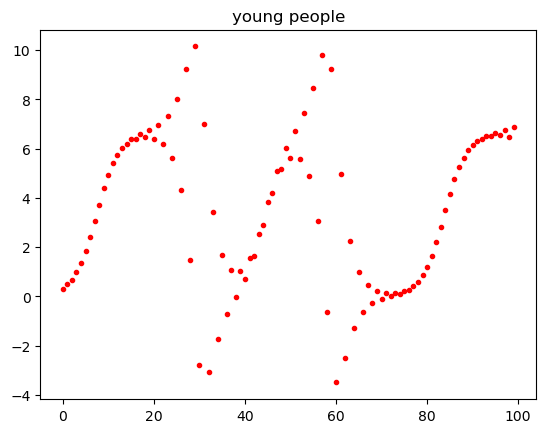

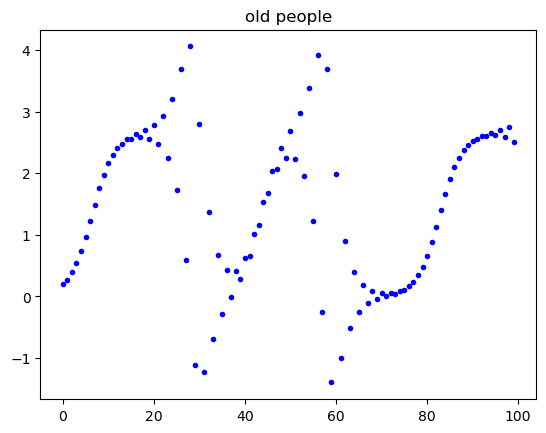

In [74]:
N = 100
x1, x2 = [0] * N, [0] * N
x1[0], x2[0] = 0.3, 0.2

b, c, s, D = 2.5, 0.4, 0.8, 0.3

for i in range(1, N):
    x1[i] = b * x2[i - 1]
    x2[i] = c*x1[i-1] + s*x2[i-1] - D*x2[i-1]^2

plt.plot(range(N), x1, 'ro', ms=3)
plt.title("young people")
plt.show()
plt.plot(range(N), x2, 'bo', ms=3)
plt.title("old people")
plt.show()